<a href="https://colab.research.google.com/github/ruchinamaratunga/pump_it_up_ml_competition/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
!pip install geopandas

In [231]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas
from scipy import stats

plt.style.use("seaborn-whitegrid")

In [232]:
label_path = "/content/drive/MyDrive/Colab Notebooks/ML_final_project/train_label.csv"
data_path = "/content/drive/MyDrive/Colab Notebooks/ML_final_project/train_values.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/ML_final_project/test.csv"

labels = pd.read_csv(label_path)
data = pd.read_csv(data_path)

# Data Analytics


* `amount_tsh` - Total static head (amount water available to waterpoint)
* `date_recorded` - The date the row was entered
* `funder` - Who funded the well
* `gps_height` - Altitude of the well
* `installer` - Organization that installed the well
* `longitude` - GPS coordinate
* `latitude` - GPS coordinate
* `wpt_name` - Name of the waterpoint if there is one
* `num_private` -
* `basin` - Geographic water basin
* `subvillage` - Geographic location
* `region` - Geographic location
* `region_code` - Geographic location (coded)
* `district_code` - Geographic location (coded)
* `lga` - Geographic location
* `ward` - Geographic location
* `population` - Population around the well
* `public_meeting` - True/False
* `recorded_by` - Group entering this row of data
* `scheme_management` - Who operates the waterpoint
* `scheme_name` - Who operates the waterpoint
* `permit` - If the waterpoint is permitted
* `construction_year` - Year the waterpoint was constructed
* `extraction_type` - The kind of extraction the waterpoint uses
* `extraction_type_group` - The kind of extraction the waterpoint uses
* `extraction_type_class` - The kind of extraction the waterpoint uses
* `management` - How the waterpoint is managed
* `management_group` - How the waterpoint is managed
* `payment` - What the water costs
* `payment_type` - What the water costs
* `water_quality` - The quality of the water
* `quality_group` - The quality of the water
* `quantity` - The quantity of water
* `quantity_group` - The quantity of water
* `source` - The source of the water
* `source_type` - The source of the water
* `source_class` - The source of the water
* `waterpoint_type` - The kind of waterpoint
* `waterpoint_type_group` - The kind of waterpoint

In [233]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [234]:
df = data.copy()
df["status_group"] = labels["status_group"]
data = df.copy()
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [235]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [237]:
df.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

Text(0.5, 1.0, 'Missing values')

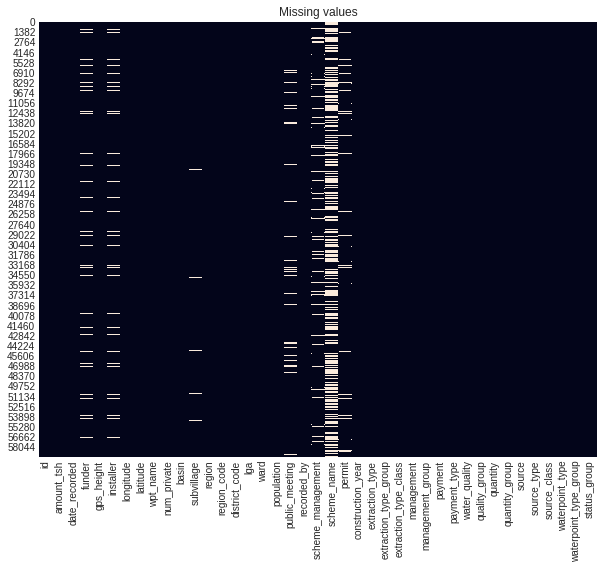

In [238]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values")

In [239]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [240]:
print(df[["amount_tsh", 'status_group']].groupby(["status_group"], as_index=False).mean())

              status_group  amount_tsh
0               functional  461.798235
1  functional needs repair  267.071577
2           non functional  123.481230


In [241]:
temp1 = df[["basin", 'status_group']].loc[df.status_group == "functional"].groupby("basin", as_index=False).count()
temp2 = df[["basin", 'status_group']].loc[df.status_group == "non functional"].groupby("basin", as_index=False).count()
temp3 = df[["basin", 'status_group']].loc[df.status_group == "functional needs repair"].groupby("basin", as_index=False).count()
temp1["a"] = temp2["status_group"]
temp1["b"] = temp2["status_group"]
temp1.columns = ["basin_type", "functional", "non functional", "functional needs repair"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


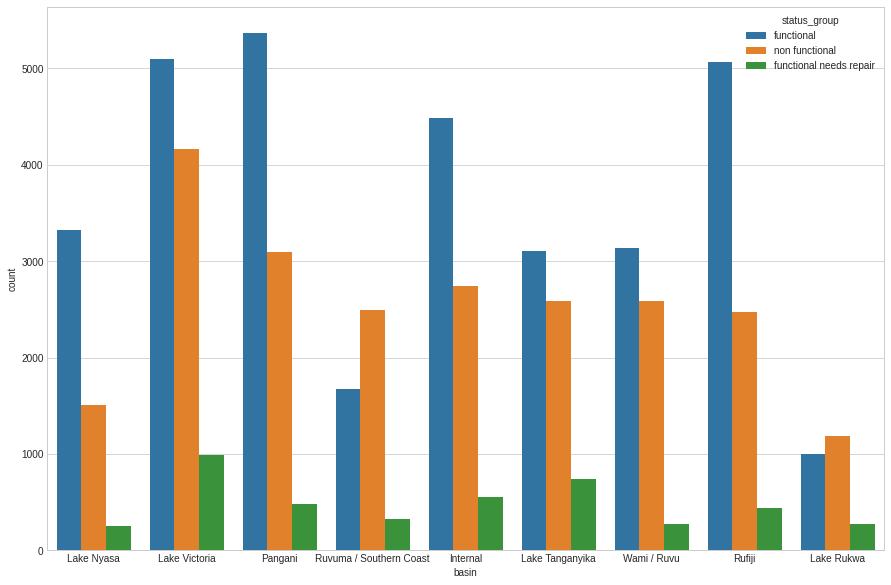

In [242]:
plt.figure(figsize=(15,10))
sns.countplot("basin", hue="status_group", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


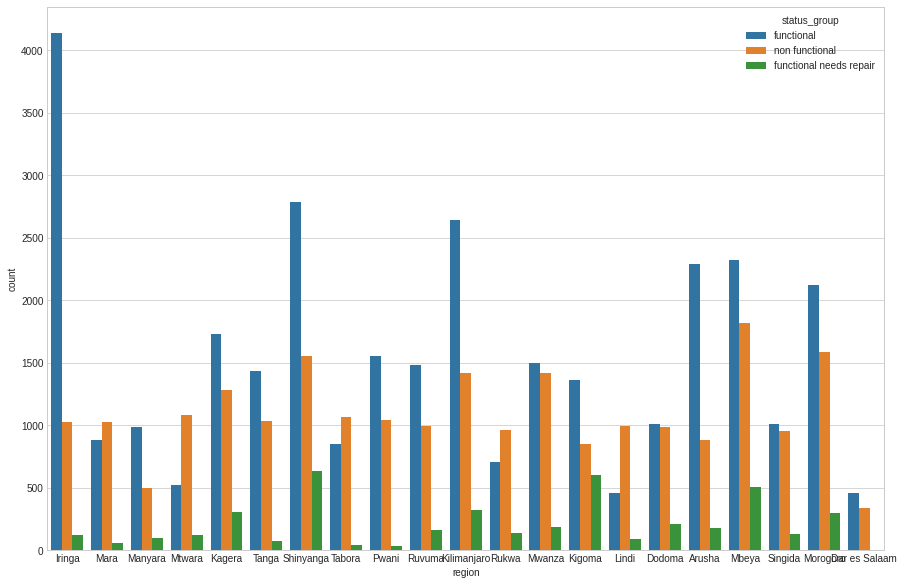

In [243]:
plt.figure(figsize=(15,10))
sns.countplot("region", hue="status_group", data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


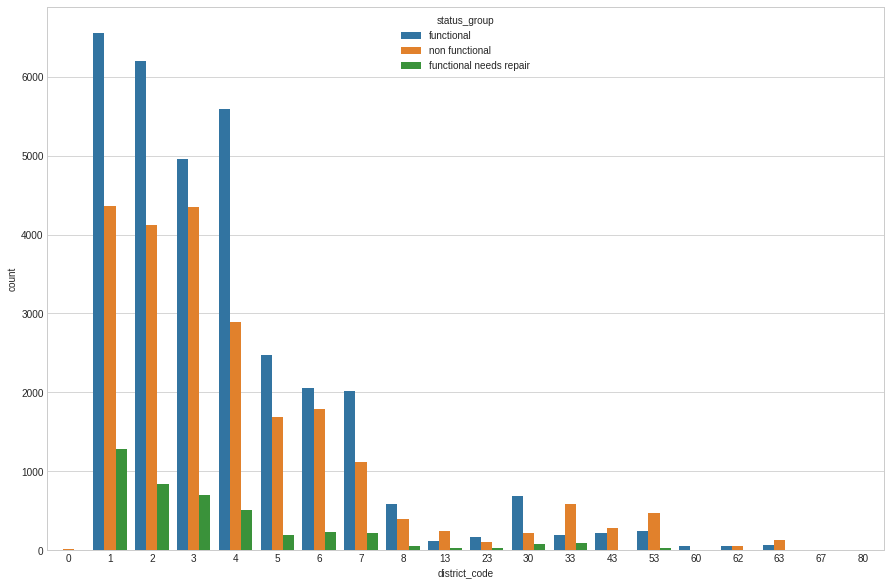

In [244]:
plt.figure(figsize=(15,10))
sns.countplot("district_code", hue="status_group", data=df)

In [245]:
print(df[["population", 'status_group']].groupby(["status_group"], as_index=False).mean())

              status_group  population
0               functional  187.553303
1  functional needs repair  175.102154
2           non functional  170.016430


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


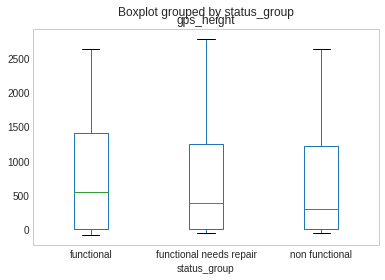

In [285]:
df.boxplot(by ='status_group', column =['gps_height'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


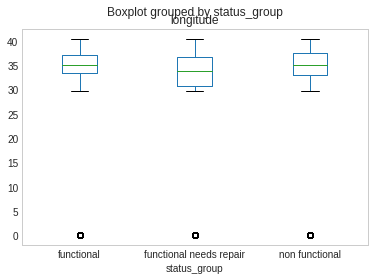

In [286]:
df.boxplot(by ='status_group', column =['longitude'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


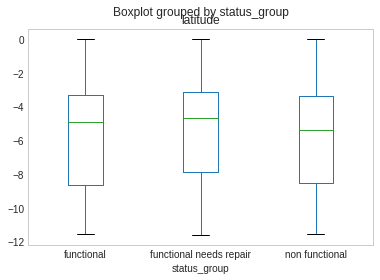

In [287]:
df.boxplot(by ='status_group', column =['latitude'], grid = False)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


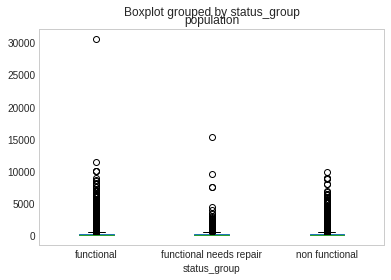

In [288]:
df.boxplot(by ='status_group', column =['population'], grid = False)

In [246]:
df["subvillage"].value_counts(dropna=True).value_counts()
# here we can see most of the subvillages have only one water pump so taking sub
# village to decide is not a good idea.

1      9424
2      3839
3      2093
4      1213
5       747
       ... 
102       1
86        1
373       1
69        1
55        1
Name: subvillage, Length: 92, dtype: int64

In [247]:
df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [248]:
df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [249]:
df.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [250]:
df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [251]:
print(df["installer"].value_counts(dropna=True))

DWE                      17402
Government                1825
RWE                       1206
Commu                     1060
DANIDA                    1050
                         ...  
Quick win/halmashauri        1
Losakia water supply         1
Joseph nkunda                1
WEEPERS                      1
world banks                  1
Name: installer, Length: 2145, dtype: int64


In [252]:
df["installer"].value_counts(dropna=True).value_counts().sort_index()

1        1098
2         210
3         135
4          83
5          68
         ... 
1050        1
1060        1
1206        1
1825        1
17402       1
Name: installer, Length: 153, dtype: int64

In [253]:
# not effective to take as a feature, too many different values
df["funder"].value_counts(dropna=True).value_counts().sort_index()

1       974
2       184
3       113
4        54
5        49
       ... 
1349      1
1374      1
2202      1
3114      1
9084      1
Name: funder, Length: 159, dtype: int64

In [254]:
print(df["gps_height"].max())
print(df["gps_height"].min()) 

2770
-90


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


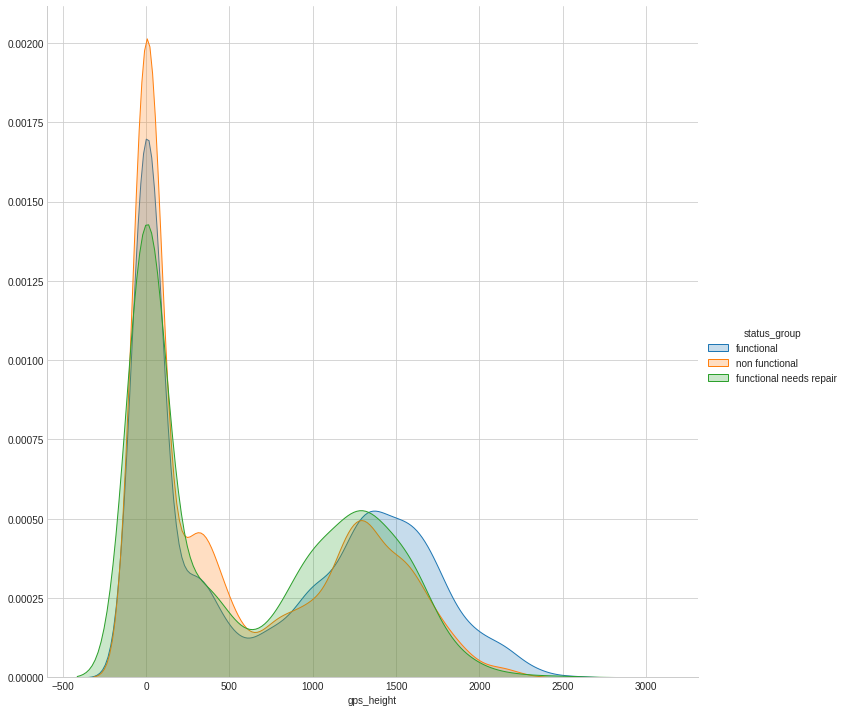

In [255]:
(sns
  .FacetGrid(df, 
             hue='status_group',size=10)
  .map(sns.kdeplot, 'gps_height', shade=True)
 .add_legend())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


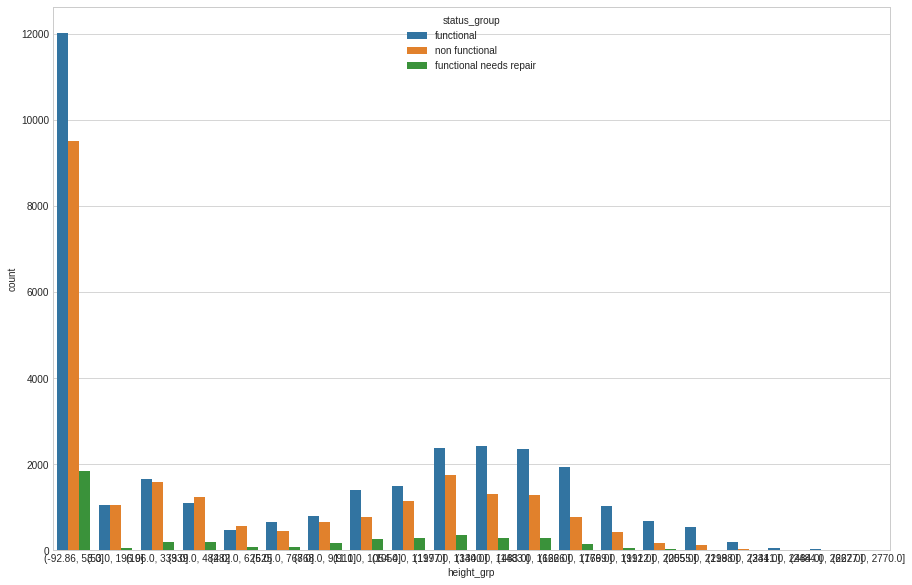

In [256]:
temp = df.copy()
temp["height_grp"] = pd.cut(df["gps_height"], 20)

plt.figure(figsize=(15,10))
sns.countplot("height_grp", hue="status_group", data=temp)

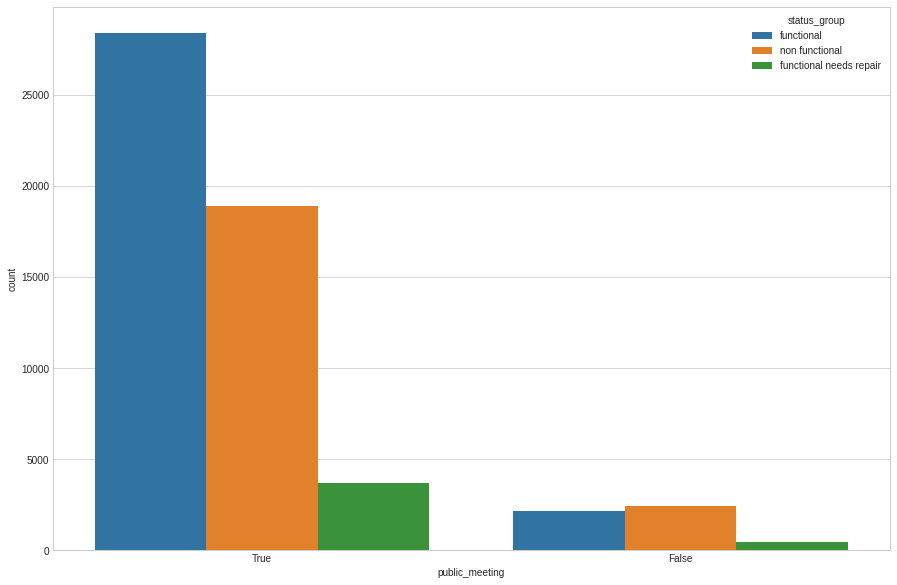

In [257]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df,x='public_meeting',hue='status_group')

In [258]:
def plot_geodata(dataset: pd.DataFrame): 
    gdf = geopandas.GeoDataFrame(data.copy(), 
                                 geometry=geopandas.points_from_xy(dataset.longitude, dataset.latitude))
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    ax = world[world.continent == 'Africa'].plot(color='white', edgecolor='black')

    gdf.plot(ax=ax, color='red',  figsize=(64, 64))

    plt.show()

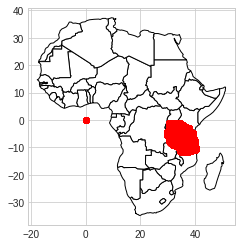

In [259]:
dataset = data.drop(["id"], axis=1)
plot_geodata(dataset)

In [302]:
# location at longitude == 0 wrong including lat and gps heihgts
data.loc[df.longitude == 0].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair


In [304]:
data.loc[df.longitude == 0].latitude.nunique()

1

In [306]:
data.loc[df.longitude == 0].gps_height.nunique()

1

# Data Preperation

In [260]:
def fill_installer_na_and_fill_1(df):
    df["installer"] = df["installer"].fillna("other")
    a = df.installer.value_counts()
    singals = a[a==1].index.to_list()
    i = df.query('installer in @singals').index
    df.loc[i, "installer"] = "other"
    return df

In [261]:
def turn_lower_case(df):
    df.waterpoint_type = df.waterpoint_type.str.lower()
    df.basin = df.basin.str.lower()
    df.region = df.region.str.lower()
    df.source = df.source.str.lower()
    df.lga = df.lga.str.lower()
    df.management = df.management.str.lower()
    df.quantity = df.quantity.str.lower()
    df.water_quality = df.water_quality.str.lower()
    df.payment_type=df.payment_type.str.lower()
    df.extraction_type=df.extraction_type.str.lower()
    return df

In [262]:
# df1 = data.copy()
# df1 = fill_installer_na_and_fill_1(df1)
# df1.loc[df1.installer.isnull()]

In [263]:
def duration(df):
    temp = pd.DataFrame()
    temp["record_year"] = df.date_recorded
    temp["construction_year"] = pd.to_datetime(df.construction_year)
    temp["construction_year"] = pd.DatetimeIndex(temp["construction_year"]).year
    temp["record_year"] = pd.to_datetime(temp["record_year"])
    temp["record_year"] = pd.DatetimeIndex(temp["record_year"]).year
    df["duration"] = temp.record_year - temp.construction_year

    return df

In [264]:
def drop_columns(df):
    drop = ["wpt_name", "id", "lga", "ward", 
            "recorded_by", "extraction_type_class", "management", "management_group", 
            "quantity_group", "source_type", "payment_type", "quality_group",
            "waterpoint_type_group", "funder", "subvillage", "public_meeting", "scheme_name", 
            "scheme_management", "permit", "extraction_type_group", "date_recorded", "num_private", "source_class"]

    for i in drop:
        df.drop(i, axis=1,inplace=True)

    return df

In [265]:
def bin_height_train(df):
    df['height_grp'],bins = pd.cut(df["gps_height"], 20,retbins=True)
    return df , bins

In [266]:
def bin_height_test(df, binss):
    df["height_grp"] = pd.cut(df["gps_height"], bins=binss)
    return df

In [366]:
def location_outliers_correction(df):
    df.loc[df.longitude == 0].longitude.replace(0, np.NaN, inplace=True)
    df.loc[df.latitude == -2e-08].replace(-2e-08, np.NaN, inplace=True)
    df.loc[df.longitude == 0].replace(0, np.NaN, inplace=True)
    df.longitude.fillna(df.groupby("subvillage")["longitude"].transform("mean"),inplace=True)
    df.latitude.fillna(df.groupby("subvillage")["latitude"].transform("mean"), inplace=True)
    df.gps_height.fillna(df.groupby("subvillage")["gps_height"].transform("mean"), inplace=True)
    return df

In [268]:
def label_encoding(df):
    encoding_cols = ["basin", "extraction_type", "payment", "region", "water_quality", "quantity", "source", "waterpoint_type", "installer", "status_group"]   

    encodings = []

    for i in encoding_cols:
        map = {}
        uni_vals = df[i].unique()
        k = 0
        for j in uni_vals:
            map[j] = k
            k += 1
        encodings.append(map)

    l = 0
    for i in encoding_cols:
        df[i] = df[i].map(encodings[l]).astype("category")
        l += 1

    return df, encodings



In [269]:
def label_encoding_test_set(df, encodings):
    encoding_cols = ["basin","extraction_type", "payment", "region", "water_quality", "quantity", "source", "waterpoint_type", "installer"]

    # keys = encodings.keys()

    # stop = False
    # k = 0
    # for i in encoding_cols:
    #     map = {}
    #     uni_vals = df[i].unique()
    #     for j in range(len(keys[k])):
    #         if (uni_vals[j] in keys):
    #             continue
    #         else:
    #             print(uni_vals[j] + " not in the keys")
    #             stop = True
    #     k += 1

    # if(stop):
    #     return

    l = 0
    for i in encoding_cols:
        df[i] = df[i].map(encodings[l]).astype("category")
        l += 1
    
    return df


In [270]:
def plot_features_importances(classifier, X_train):
    series = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    series = series.plot(kind='barh', figsize=(10,10))
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.show()

# Model Training

In [367]:
df_train = data.copy()
# df_trian = duration(df_train)
df_train = location_outliers_correction(df_train)
# df_train, bins = bin_height_train(df_train)
df_train = fill_installer_na_and_fill_1(df_train)
df_train, encodings = label_encoding(df_train)
output_maps = encodings[-1]
df_train = drop_columns(df_train)
df_train.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


amount_tsh            float64
gps_height              int64
installer            category
longitude             float64
latitude              float64
basin                category
region               category
region_code             int64
district_code           int64
population              int64
construction_year       int64
extraction_type      category
payment              category
water_quality        category
quantity             category
source               category
waterpoint_type      category
status_group         category
dtype: object

In [368]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [273]:

# classifiers = [

#     RandomForestClassifier(n_estimators=200)
# ]

# # classifiers = [
# #     KNeighborsClassifier(3),
# #     SVC(probability=True),
# #     DecisionTreeClassifier(),
# #     RandomForestClassifier(),
# # 	AdaBoostClassifier(),
# #     GradientBoostingClassifier(),
# #     GaussianNB(),
# #     LinearDiscriminantAnalysis(),
# #     QuadraticDiscriminantAnalysis(),
# #     LogisticRegression()]

# log_cols = ["Classifier", "Accuracy"]
# log 	 = pd.DataFrame(columns=log_cols)

# sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

# X = df_train.loc[:, "amount_tsh":"waterpoint_type_group"]
# y = df_train.loc[:, "status_group"]

# acc_dict = {}


# for train_index, test_index in sss.split(X, y):
# 	X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
	
# 	for clf in classifiers:
# 		name = clf.__class__.__name__
# 		clf.fit(X_train, y_train)
# 		train_predictions = clf.predict(X_test)
# 		acc = accuracy_score(y_test, train_predictions)
# 		if name in acc_dict:
# 			acc_dict[name] += acc
# 		else:
# 			acc_dict[name] = acc

# for clf in acc_dict:
# 	acc_dict[clf] = acc_dict[clf] / 10.0
# 	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
# 	log = log.append(log_entry)

# plt.xlabel('Accuracy')
# plt.title('Classifier Accuracy')

# sns.set_color_codes("muted")
# sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [369]:
test_data = pd.read_csv(test_path)
test_ids = test_data.id

In [370]:
df_test = test_data.copy()
# df_test = duration(df_test)
df_test = location_outliers_correction(df_test)
# df_test = bin_height_test(df_test, bins)
df_test = fill_installer_na_and_fill_1(df_test)
df_test = label_encoding_test_set(df_test, encodings)
df_test.loc[df_test.installer.isnull()]
df_test = drop_columns(df_test)
df_test.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


amount_tsh            float64
gps_height              int64
installer            category
longitude             float64
latitude              float64
basin                category
region               category
region_code             int64
district_code           int64
population              int64
construction_year       int64
extraction_type      category
payment              category
water_quality        category
quantity             category
source               category
waterpoint_type      category
dtype: object

In [371]:
# i = df_test.loc[df_test.height_grp.isna()].index
# df_test.loc[i, "height_grp"] = 19

In [372]:
df_test.installer.fillna(19,inplace=True)
# df_test.installer

In [373]:
df_train.dtypes

amount_tsh            float64
gps_height              int64
installer            category
longitude             float64
latitude              float64
basin                category
region               category
region_code             int64
district_code           int64
population              int64
construction_year       int64
extraction_type      category
payment              category
water_quality        category
quantity             category
source               category
waterpoint_type      category
status_group         category
dtype: object

In [374]:
X = df_train.loc[:, "amount_tsh":"waterpoint_type"]
# X["duration"] = df_train["duration"]
# X["height_grp"] = df_train["height_grp"]
y = df_train.loc[:, "status_group"]

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

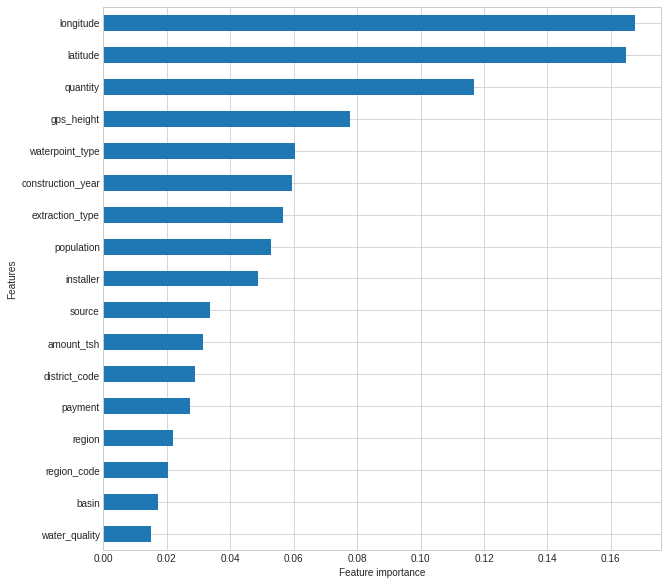

In [375]:
plot_features_importances(clf, X)

In [376]:
test_predictions = clf.predict(df_test)

In [377]:
test_results = pd.DataFrame({'id': test_ids, 'status_group': test_predictions})
output_maps = {value:key for key, value in output_maps.items()}
test_results["status_group"] = test_results["status_group"].map(output_maps)
test_results

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,functional
14848,33492,functional


In [378]:
output_path = "/content/drive/MyDrive/Colab Notebooks/ML_final_project/RD_6.csv"
test_results.to_csv(output_path,index=False)

In [379]:
test_results.dtypes

id               int64
status_group    object
dtype: object